# Video Game Machine Learning

In this project, I will explore the vgsales dataset containing sales information on over 16000 games.  The dataset features columns that detail game publisher, sales rank, platform, year released, and regional sales information.  After exploring and cleaning the data, I will apply some machine learning techniques to predict global sales.

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
df = pd.read_csv("vgsales.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [29]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [30]:
# Check for null values
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Here we see that Year and Publisher have null values.  To resolve this, I have decided to discard the rows containing null values.

In [31]:
# Removing rows with null values
df = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Let's explore this data to get a better understanding of it

In [35]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Data Visualization

Text(0, 0.5, 'Games')

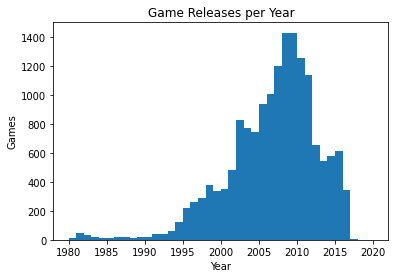

In [32]:
# Histogram of game releases per year
plt.hist(df['Year'], bins=(df['Year'].max() - df['Year'].min()).astype(int))
plt.title("Game Releases per Year")
plt.xlabel("Year")
plt.ylabel("Games")

Text(0, 0.5, 'Sales')

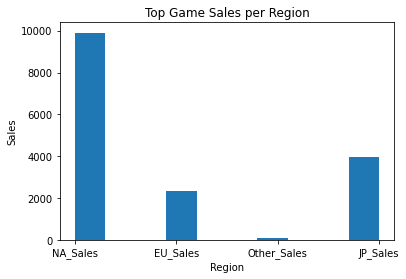

In [36]:
# Top Game sales per region
plt.hist(df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].idxmax(1))
plt.title("Top Game Sales per Region")
plt.xlabel("Region")
plt.ylabel("Sales")

Text(0.5, 1.0, 'Total Sales per Console')

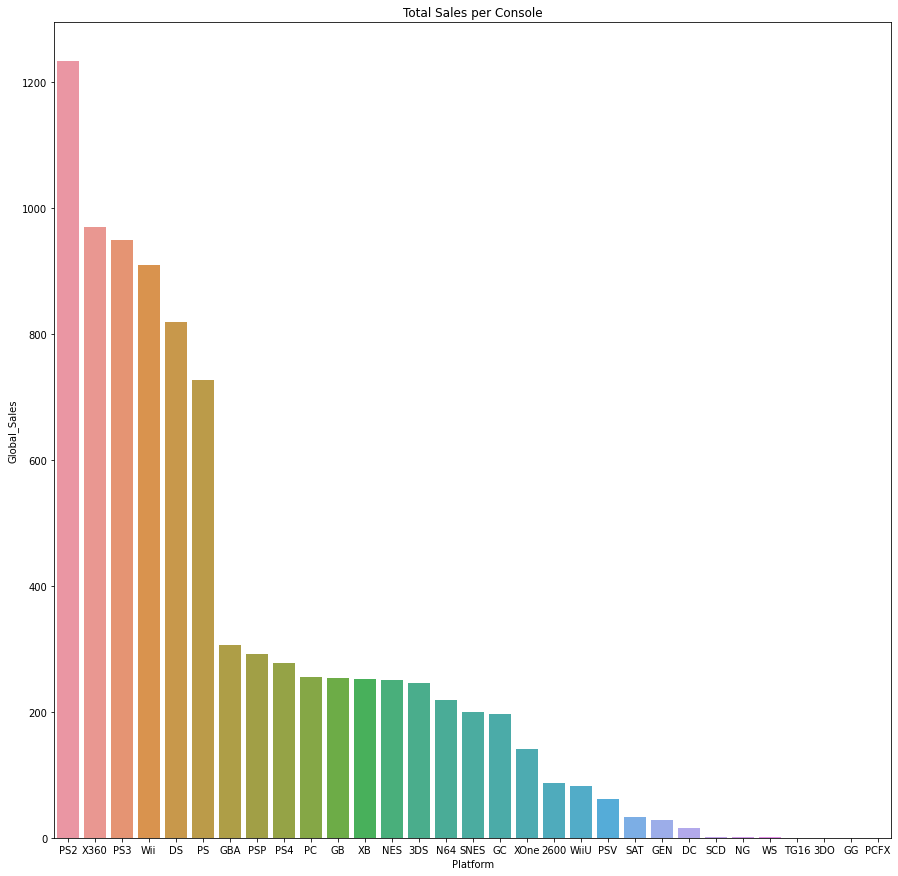

In [42]:
# Total sales per console
plt.figure(figsize=(15, 15))
platforms = df.groupby(by=["Platform"])["Global_Sales"].sum().reset_index().sort_values(by=["Global_Sales"], ascending=False)
sns.barplot(x="Platform", y="Global_Sales", data=platforms)
plt.title("Total Sales per Console")

Text(0.5, 1.0, 'Sales by Genre Heatmap')

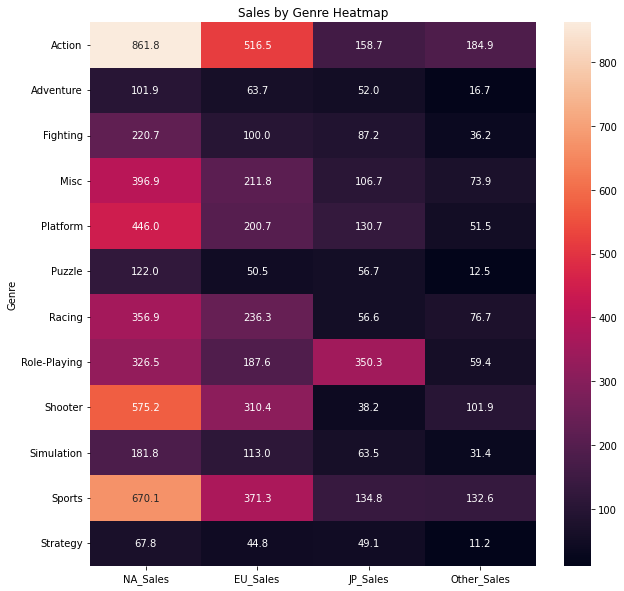

In [48]:
# Sales Genre Heatmap
genres = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].groupby(by=['Genre']).sum()
plt.figure(figsize=(10,10))
sns.heatmap(genres, annot=True, fmt='.1f')
plt.title("Sales by Genre Heatmap")

Text(0.5, 1.0, 'Correlation Heatmap of Numerical Features')

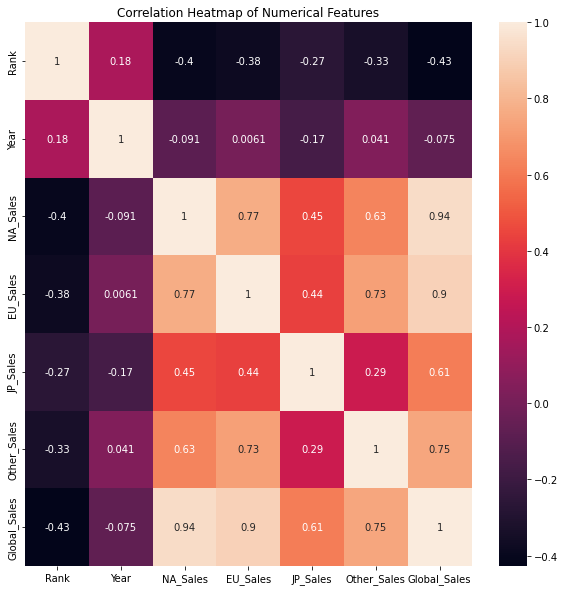

In [52]:
# Correlation Heatmap of Numerical Features
plt.figure(figsize=(10, 10))
sns.heatmap(df[['Rank', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr(), annot=True)
plt.title("Correlation Heatmap of Numerical Features")

Let's try and add in Genre, Platform, and Publisher columns to see how they correlate with sales

In [64]:
from sklearn.preprocessing import LabelEncoder as label

# Generating label encoders for text values
data = df.copy()
data["Genre"] = label().fit_transform(data["Genre"])
data["Platform"] = label().fit_transform(data["Platform"])
data["Publisher"] = label().fit_transform(data["Publisher"])


Text(0.5, 1.0, 'Correlation Heatmap of Major Features')

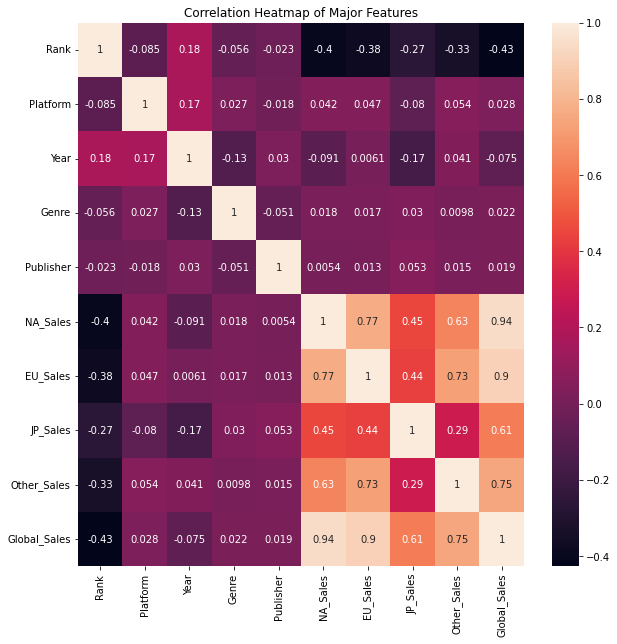

In [65]:
# Check heatmap again with year, platform, and publisher correlations
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True)
plt.title("Correlation Heatmap of Major Features")

## Model Creation

Let's get to creating our model using various machine learning techniques.  First, we'll start by separating our features from our target, and the creating test and training sets.

In [97]:
x = data[['Rank', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].values
y = data['Global_Sales'].values

# Split into 20% testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(13032, 9) (13032,) (3259, 9) (3259,)


### Linear Regression

In [101]:
# Creating Linear Regression Model
lr = LinearRegression()

lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

r2 = r2_score(y_test, y_pred)

print("R2 Score: ", r2)

R2 Score:  0.9999933361844177


From the R2 score can see that this model fits our data extremely well.  Let's try implementing some other techniques.

### Decision Tree

In [99]:
from sklearn.tree import DecisionTreeRegressor

# Applying Decision Tree Regressor
tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)

r2 = r2_score(y_pred, y_test)
print("R2 Score: ", r2)

R2 Score:  0.7437747184941056


The Decision Tree Regression model gave us an r2 score of 0.744, which isn't nearly as good as our earlier result.

### Support Vector Machine Regression

In [100]:
from sklearn.svm import SVR

# Applying linear Support Vector Regression
svr = SVR(kernel='linear')
svr.fit(x_train, y_train)
y_pred = svr.predict(x_test)

r2 = r2_score(y_pred, y_test)
print("R2 Score: ", r2)

R2 Score:  -0.3243137036189756


From our negative r2 score of the svm model, we can conclude that it is not trained to the model properly.  I think this might be due to the extra columns I left in that are not well correlated to the data such as Platform and Publisher.

### K-Nearest Neighbors

Text(0, 0.5, 'R2_Score')

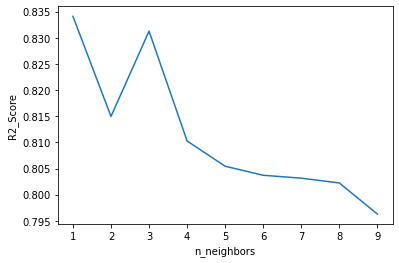

In [94]:
from sklearn.neighbors import KNeighborsRegressor

# Create Line Plot to find ideal neighbors size
r2_scores = []
for n in range(1, 10):
    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(x_train, y_train)

    r2_scores.append(r2_score(y_test, knn.predict(x_test)))

plt.plot(range(1,10), r2_scores)
plt.xlabel("n_neighbors")
plt.ylabel("R2_Score")

From this we can see that n_neighbors = 1 gives us the best r2 score.

In [95]:
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

r2 = r2_score(y_test, y_pred)
print(r2)

0.8341093456042126


Here we get an r2 of 0.834.  Not quite as good as our linear regression model

## Conclusion

In conclusion, I found that by applying a linear regression model to this data I was able to produce extremely good results.  To further build on this project, I would like to experiment with different types of feature selection and omissions.  It would also be interesting to apply these techniques to a dataset that includes mobile games as those are extremely popular especially in the east.  I would also like to try this out on a dataset that includes user ratings for games, and try to predict scores per region.